<a href="https://colab.research.google.com/github/cheysreylin/Bitcoin-Prediction/blob/main/TGI_Final_project_LR_SVR_D_Tree_RF_MTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [ ]:
from google.colab import files
file = files.upload()

Saving Bitcoin Historical Data - Investing.com.csv to Bitcoin Historical Data - Investing.com (4).csv


In [ ]:
df = pd.read_csv("Bitcoin Historical Data - Investing.com.csv")
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 31, 2022","20,380.7","19,793.4","20,440.7","19,793.4",319.61K,2.97%
1,"Aug 30, 2022","19,792.6","20,295.6","20,558.2","19,559.7",308.41K,-2.48%
2,"Aug 29, 2022","20,295.8","19,551.3","20,394.5","19,551.2",248.04K,3.81%
3,"Aug 28, 2022","19,550.2","20,034.2","20,150.8","19,542.9",159.60K,-2.41%
4,"Aug 27, 2022","20,033.9","20,249.9","20,343.6","19,849.8",187.34K,-1.07%


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1704 non-null   object
 1   Price     1704 non-null   object
 2   Open      1704 non-null   object
 3   High      1704 non-null   object
 4   Low       1704 non-null   object
 5   Vol.      1704 non-null   object
 6   Change %  1704 non-null   object
dtypes: object(7)
memory usage: 93.3+ KB


In [ ]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1704,1704,1704,1704,1704,1704,1704
unique,1704,1698,1692,1689,1699,1631,937
top,"Aug 31, 2022","7,530.8","3,809.7","57,697.4","8,153.2",1.05M,-0.50%
freq,1,2,2,2,2,6,8


In [ ]:
df.describe().T

,count,unique,top,freq
Date,1704,1704,"Aug 31, 2022",1
Price,1704,1698,"7,530.8",2
Open,1704,1692,"3,809.7",2
High,1704,1689,"57,697.4",2
Low,1704,1699,"8,153.2",2
Vol.,1704,1631,1.05M,6
Change %,1704,937,-0.50%,8


In [ ]:
# NA Value
df.isna().sum() / df.shape[0]

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [ ]:
print("Column", df.shape[1])
print("Row", df.shape[0])

Column 7
Row 1704


In [ ]:
# NA Value
df.isnull().sum() / df.shape[0]

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [ ]:
# Duplicate value
df.duplicated().sum() / len(df) * 100

0.0

In [ ]:
df.drop(['Date', 'Vol.', 'Change %'],1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Price,Open,High,Low
0,"20,380.7","19,793.4","20,440.7","19,793.4"
1,"19,792.6","20,295.6","20,558.2","19,559.7"
2,"20,295.8","19,551.3","20,394.5","19,551.2"
3,"19,550.2","20,034.2","20,150.8","19,542.9"
4,"20,033.9","20,249.9","20,343.6","19,849.8"


In [ ]:
# create the independent dataset

# convert the dataset into numpy array
x = np.array(df.drop(["Price"], 1))

# remove comma in every element
for key, i in enumerate(x):
  for index, j in enumerate(i):
    j = j.replace(",", "")

    j = float(j)  # convert to float
    i[index] = j  # assigned the value
  
  x[key] = i  # assign the value to the key
  
print(x)

[[19793.4 20440.7 19793.4]
 [20295.6 20558.2 19559.7]
 [19551.3 20394.5 19551.2]
 ...
 [14754.1 15435.0 14579.7]
 [13444.9 15306.1 12934.2]
 [13850.5 13921.5 12877.7]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
# create dependent dataset
y = np.array(df["Price"])
print(y)

['20,380.7' '19,792.6' '20,295.8' ... '15,156.6' '14,754.1' '13,444.9']


In [ ]:
y = y.reshape(-1, 1)
print(y)

[['20,380.7']
 ['19,792.6']
 ['20,295.8']
 ...
 ['15,156.6']
 ['14,754.1']
 ['13,444.9']]


In [ ]:
# remove comma in every element
for m in y:
  for n in m:
    n = n.replace(",", "")

    n = float(n)  # convert to float
    m[0] = n  # assigned the value
print(y)


[[20380.7]
 [19792.6]
 [20295.8]
 ...
 [15156.6]
 [14754.1]
 [13444.9]]


In [ ]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(1363, 3)
(341, 3)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[0.01612595 0.0176203  0.015257  ]
 [0.61967244 0.61629353 0.62397736]
 [0.52484833 0.53298137 0.52983079]
 ...
 [0.09886299 0.09732713 0.09943808]
 [0.59599752 0.59386866 0.59212387]
 [0.07650688 0.07461462 0.07684866]]
[[1.11831863e-01 1.10920538e-01 1.13757741e-01]
 [3.06375884e-04 4.79543680e-03 1.04658325e-03]
 [7.89773266e-01 7.93590764e-01 7.94326600e-01]
 ...
 [6.84182451e-02 6.72456904e-02 5.76570785e-02]
 [1.00488180e-01 1.03553128e-01 1.02424241e-01]
 [9.18707747e-02 9.14146310e-02 9.37982422e-02]]


# MLPRegressor Model

In [ ]:
MLP_model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu',
                     solver='adam', learning_rate_init=0.1, max_iter=100)
MLP_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate_init=0.1,
             max_iter=100)

In [ ]:
MLP_prediction = MLP_model.predict(X_test)

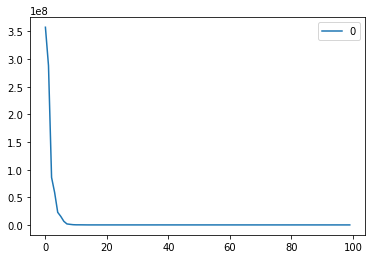

In [ ]:
pd.DataFrame(MLP_model.loss_curve_).plot()


In [ ]:
mae = metrics.mean_absolute_error(y_test, MLP_prediction)
r2 = metrics.r2_score(y_test, MLP_prediction)
mse = metrics.mean_squared_error(y_test, MLP_prediction)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", MLP_model.score(X_test, y_test))

Mean Absolute Error:  348.113852426614
Mean Squared Error:  324795.3953487922
R2 Score:  0.9989615639382443
Accuracy score 0.9989615639382443


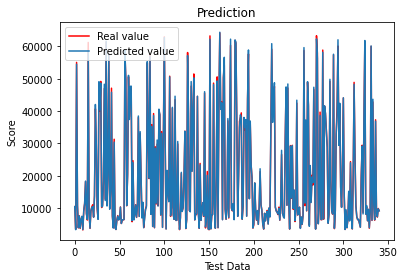

In [ ]:

# visualize the predicted value with real value

plt.plot(y_test, label='Real value', color="red")
plt.plot(MLP_prediction, label='Predicted value')

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()

# Random Forest Model

In [ ]:
Random_model = RandomForestRegressor(n_estimators = 10)
Random_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=10)

In [ ]:
RF_prediction = Random_model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_test, RF_prediction )
r2 = metrics.r2_score(y_test, RF_prediction)
mse = metrics.mean_squared_error(y_test, RF_prediction)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", Random_model.score(X_test, y_test))


Mean Absolute Error:  280.84170087976526
Mean Squared Error:  248169.70075835742
R2 Score:  0.9992065516617751
Accuracy score 0.9992065516617751


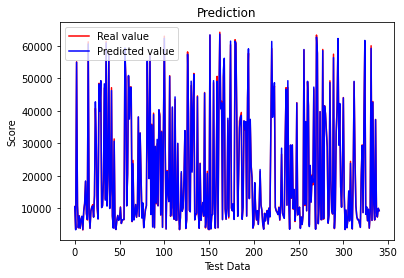

In [ ]:

# visualize the predicted value with real value

plt.plot(y_test, label='Real value',color="red")
plt.plot(RF_prediction, label='Predicted value', color = "b")

plt.title('Prediction')
plt.xlabel('Test Data')
plt.ylabel('Score')
plt.legend()
plt.show()


# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor().fit(X_train, y_train)
DecisionTree_Prediction = DT_model.predict(X_test)
my_datasets = pd.DataFrame({"Decision_Prediction": DecisionTree_Prediction, "Actual Value": y_test.reshape(-1)})
print(my_datasets)


     Decision_Prediction Actual Value
0                10461.1      10531.5
1                 3422.2       3526.1
2                54452.5      55036.5
3                10789.5      10776.2
4                 4006.4       3965.2
..                   ...          ...
336              36950.6      37314.6
337               8656.1       8566.7
338               7129.2       7272.5
339              10082.0       9932.5
340               9255.4       9229.9

[341 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score

mae = metrics.mean_absolute_error(y_test, DecisionTree_Prediction)
r2 = metrics.r2_score(y_test, DecisionTree_Prediction)
mse = metrics.mean_squared_error(y_test, DecisionTree_Prediction)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", DT_model.score(X_test, y_test))


Mean Absolute Error:  341.28504398826976
Mean Squared Error:  343476.9207038123
R2 Score:  0.9989018353525098
Accuracy score 0.9989018353525098


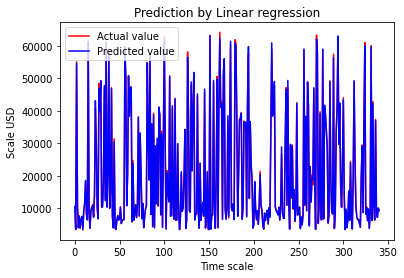

In [ ]:
# Plot between predicted value and True value
plt.plot(y_test, label="Actual value", color="red")
plt.plot(DecisionTree_Prediction, label="Predicted value", color="b")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()


# SVR 

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.svm import SVR
# RBF_SVR_model = SVR(kernel='rbf',  C=1e3, gamma = 0.1).fit(X_train, y_train)
poly_SVR_model = SVR(kernel = 'poly', C = 1000.0, degree = 2).fit(X_train, y_train)
# lin_SVR_model = SVR(kernel = 'linear', C = 1e3).fit(x_train, y_train)
rbf_SVR_predicted = poly_SVR_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import r2_score

mae = metrics.mean_absolute_error(y_test, rbf_SVR_predicted)
r2 = metrics.r2_score(y_test, rbf_SVR_predicted)
mse = metrics.mean_squared_error(y_test, rbf_SVR_predicted)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", poly_SVR_model.score(X_test, y_test))

Mean Absolute Error:  3675.1197357307506
Mean Squared Error:  24410801.597139895
R2 Score:  0.921953768317397
Accuracy score 0.921953768317397


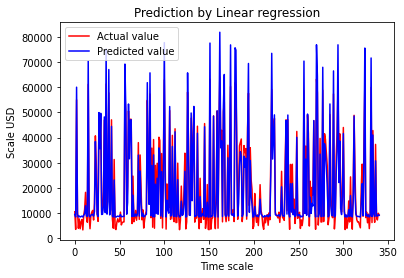

In [ ]:
# Plot between predicted value and True value
plt.plot(y_test, label="Actual value", color="r")
plt.plot(rbf_SVR_predicted, label="Predicted value", color="b")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()


# Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
LR_model = linear_regression.fit(X_train, y_train)
# find intercept and slope ( coefficient )
Q_0 = LR_model.intercept_
print(Q_0)

Q_1 = LR_model.coef_
print(Q_1)


[3232.00280364]
[[-35747.53415981  59453.31861951  40830.13071114]]


In [ ]:
Linear_prediction = LR_model.predict(X_test)

In [ ]:
Actual_value = y_test.reshape(-1)
Linear_prediction = Linear_prediction.reshape(-1)
my_datasets = pd.DataFrame(
    {"Linear_Prediction": Linear_prediction, "Actual Value": Actual_value})
print(my_datasets)


     Linear_Prediction Actual Value
0         10473.626960      10531.5
1          3548.887384       3526.1
2         54613.619460      55036.5
3         10664.666217      10776.2
4          3959.931447       3965.2
..                 ...          ...
336       36958.565585      37314.6
337        8538.575932       8566.7
338        7138.344762       7272.5
339        9978.370449       9932.5
340        9212.546821       9229.9

[341 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score

mae = metrics.mean_absolute_error(y_test, Linear_prediction)
r2 = metrics.r2_score(y_test, Linear_prediction)
mse = metrics.mean_squared_error(y_test, Linear_prediction)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)
print("Accuracy score", LR_model.score(X_test, y_test))

Mean Absolute Error:  225.2527793366794
Mean Squared Error:  161285.86368707498
R2 Score:  0.9994843367255123
Accuracy score 0.9994843367255123


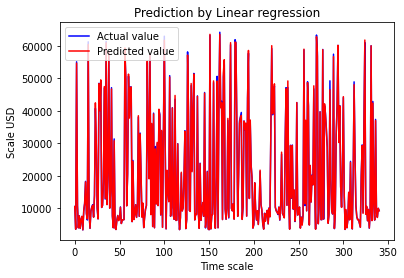

In [ ]:
# Plot between predicted value and True value
plt.plot(y_test, label="Actual value", color="b")
plt.plot(Linear_prediction, label="Predicted value", color="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()
